In [17]:
#1. Desing our model (iput, output size, forward pass)

#2. Construct the loss and optimizer

#3. Do the training of the model
# - forward pass: compute the prediction and the loss
# - backpropapation : calculate the gradients
# - update the weights

In [19]:
# import the required modules
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [21]:
# generate the regression dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=150, n_features=1, noise=20, random_state=1)

In [23]:
# convert numpy array to pytorch tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) # also convert the values from double to float
y = torch.from_numpy(y_numpy.astype(np.float32))

In [25]:
# reshape the y from 1d array to a column vector
y = y.view(y.shape[0], 1) # number of values is 1 and rows is 1

In [26]:
# Create the model, it's going to be just a single layer
# We use the built-in Linear model
n_samples, n_features = X.shape

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [28]:
# Define the loss and optimizer
learning_rate = 0.01
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # takes the model parameters and learning rate

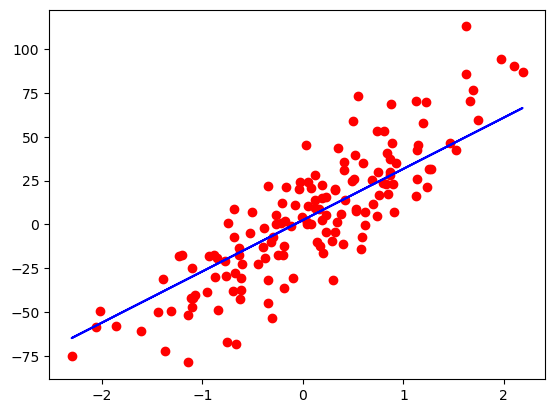

In [30]:
# Create the training loop
epochs = 100
for epoch in range(epochs):
    
    # forward pass
    y_predicted = model(X)
    loss = loss_function(y_predicted, y) # takes the predicted values and actual values
    
    # backward pass: calculate gradients
    loss.backward()
    
    
    # perform weight updates
    optimizer.step()
    
    # empty the gradients before the next iterations so they don't accumulate
    optimizer.zero_grad()
    
    if (epoch + 1 % 10) == 0: # every 10 iterations
        print(f"epoch: {epoch+1}, loss = {loss.item():4f}")
        
# prot the graphs
# We detach so that this operation is not tracked in the computational graph
predicted = model(X).detach().numpy() # detach the tensor and then convert to numpy array again.
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

In [34]:
# View the Coefficient and Intercept
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

weight: tensor([[29.2288]])
bias: tensor([2.4709])
